<a href="https://colab.research.google.com/github/Mihirgupta2001/Classification-Capstone-Project/blob/main/Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [123]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

### Dataset Loading

In [124]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [125]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Sets/data_cardiovascular_risk.csv')

### Dataset First View

In [126]:
# Dataset First Look
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


### Dataset Rows & Columns count

In [127]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [128]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [129]:
# Dataset Duplicate Value Count
df.duplicated

<bound method DataFrame.duplicated of         id  age  education sex is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0   F        YES         3.0     0.0   
1        1   36        4.0   M         NO         0.0     0.0   
2        2   46        1.0   F        YES        10.0     0.0   
3        3   50        1.0   M        YES        20.0     0.0   
4        4   64        1.0   F        YES        30.0     0.0   
...    ...  ...        ...  ..        ...         ...     ...   
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    221.0  148.0   85.0    NaN   
1                   0  

#### Missing Values/Null Values

In [130]:
# Missing Values/Null Values Count
df.isna().value_counts()

id     age    education  sex    is_smoking  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP  BMI    heartRate  glucose  TenYearCHD
False  False  False      False  False       False       False   False            False         False     False    False  False  False  False      False    False         2927
                                                                                                                                                  True     False          262
              True       False  False       False       False   False            False         False     False    False  False  False  False      False    False           77
              False      False  False       False       True    False            False         False     False    False  False  False  False      False    False           42
                                                        False   False            False         False     True     False  False  False  Fal

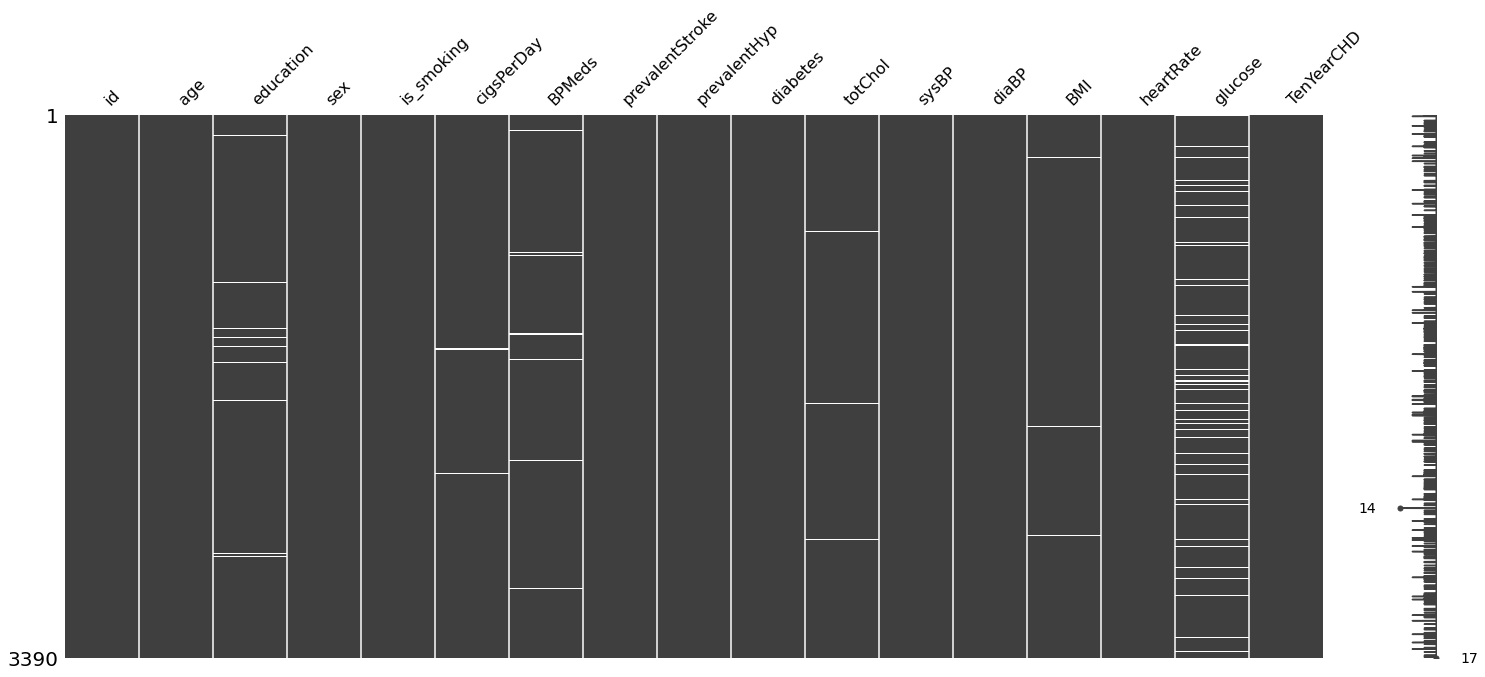

In [131]:
# Visualizing the missing values
msno.matrix(df)

### What did you know about your dataset?

The dataset has 17 columns and 131894 rows, altthough we have a good amount of data but it can be seen that a vast amount of our data contains missing values and duplicated values which needs to be dealt with moving forward.

## ***2. Understanding Your Variables***

In [132]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [133]:
# Dataset Describe
df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [134]:
# Check Unique Values for each variable.
feature = df.describe()
unique_values = []
for col in feature:
  unique_values.append(int(pd.DataFrame(df[col].unique()).count()))
  

#id column is just like index so let's drop that
unique_values = unique_values[1:]
feature_name = list(df.columns)
feature_name = feature_name[1:]
unique_dict = dict(zip(feature_name, unique_values))
print(f"unique elements in each feature are as follows: {unique_dict}")

unique elements in each feature are as follows: {'age': 39, 'education': 4, 'sex': 32, 'is_smoking': 2, 'cigsPerDay': 2, 'BPMeds': 2, 'prevalentStroke': 2, 'prevalentHyp': 240, 'diabetes': 226, 'totChol': 142, 'sysBP': 1259, 'diaBP': 68, 'BMI': 132, 'heartRate': 2}


## 3. ***Data Wrangling***

### Data Wrangling Code

In [135]:
# Write your code to make your dataset analysis ready.
# We won't be reading education and id columns for our analysis, so let's drop that
df.drop(columns = {'id','education'},inplace = True)

# Dropping duplicate values
df.drop_duplicates(inplace = True)

#Let's check information on our data frame now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   object 
 2   is_smoking       3390 non-null   object 
 3   cigsPerDay       3368 non-null   float64
 4   BPMeds           3346 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3352 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3376 non-null   float64
 12  heartRate        3389 non-null   float64
 13  glucose          3086 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 423.8+ KB


In [136]:
# Chart - 8 visualization code
#categorical_features.info()
df['sex']=df['sex'].astype('category').cat.codes
df['is_smoking']=df['is_smoking'].astype('category').cat.codes

In [137]:
# Our data is very much limited so let's not consider dropping null values

# creating a function to replace NaN values with column mean
def replace_nan_with_column_mean(df, col_name):
    df[col_name].fillna(df[col_name].mean(), inplace=True)
    return df

#Let's try to fix null values in cigsperday
#creting data frame for the observation
relevant_df = df[['cigsPerDay','is_smoking']]
#dropping null values
relevant_df.dropna(inplace = True)
# delete all rows with column 'CigsPerDay' has value 0 and also is_smoking
indexAge = relevant_df[relevant_df['cigsPerDay'] == 0.0].index
relevant_df.drop(indexAge , inplace=True)
#imposting libraries to calculate mode
import statistics
from statistics import mode
#calculating and storing mode value
mode_value = float(relevant_df['cigsPerDay'].mode())

#replacing null values with mode value
if (relevant_df['is_smoking'] == 'YES').any():
  df.cigsPerDay.fillna(mode_value,inplace = True)
else:
  df.cigsPerDay.fillna(0.0,inplace = True)

# Let's deal with BPmeds
# It is safe to say a person where sysBP and diaBP is beyond a certain limit will be getting BPmeds
relevant_df = df[['BPMeds','sysBP','diaBP']]
# It is known that low BP is considered below 90/60 and high is considered above 140/90, let's add them and make a normal range for 150 - 230
relevant_df['sys + dia'] = relevant_df['sysBP'] + relevant_df['diaBP']
# Now drop sysBP and diaBP
relevant_df.drop(columns = ['sysBP','diaBP'],inplace = True )
# Fill the nan values with 0 if it is between 150 and 230 or else put 0
if (relevant_df['sys + dia'] <= 230).any() & (relevant_df['sys + dia'] >=150 ).any():
  relevant_df.BPMeds.fillna(1.0,inplace = True)
else:
  relevant_df.BPMeds.fillna(0.0,inplace = True)

# storing the updated BPMeds column in actual dataframe 
df['BPMeds'] = relevant_df['BPMeds']


# replacing NaN values in total cholestrol,glucose,BMI and heartRate
df=replace_nan_with_column_mean(df, 'totChol')
df=replace_nan_with_column_mean(df, 'glucose')
df=replace_nan_with_column_mean(df, 'BMI')
df=replace_nan_with_column_mean(df, 'heartRate')

# Checking updated column information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   sex              3390 non-null   int8   
 2   is_smoking       3390 non-null   int8   
 3   cigsPerDay       3390 non-null   float64
 4   BPMeds           3390 non-null   float64
 5   prevalentStroke  3390 non-null   int64  
 6   prevalentHyp     3390 non-null   int64  
 7   diabetes         3390 non-null   int64  
 8   totChol          3390 non-null   float64
 9   sysBP            3390 non-null   float64
 10  diaBP            3390 non-null   float64
 11  BMI              3390 non-null   float64
 12  heartRate        3390 non-null   float64
 13  glucose          3390 non-null   float64
 14  TenYearCHD       3390 non-null   int64  
dtypes: float64(8), int64(5), int8(2)
memory usage: 377.4 KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

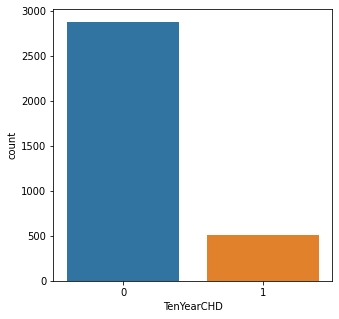

In [138]:
# Chart - 1 visualization code
#Let's explore our dependent variable selling price
plt.figure(figsize=(5,5))
sns.countplot(x=df['TenYearCHD'])

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

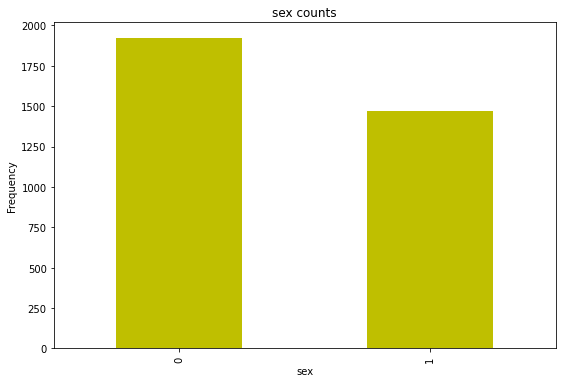

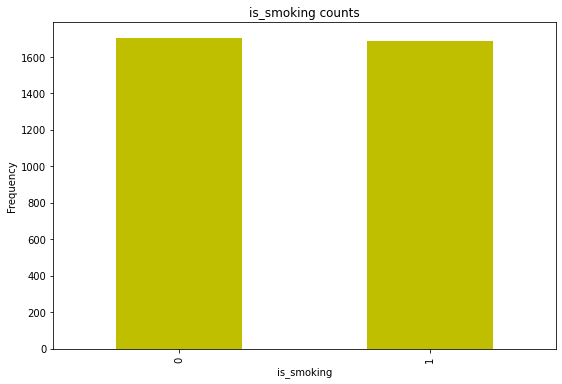

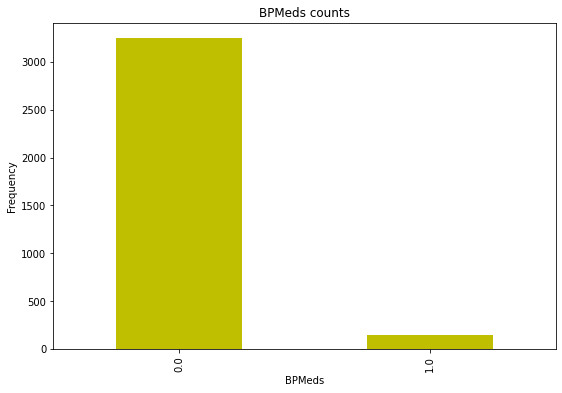

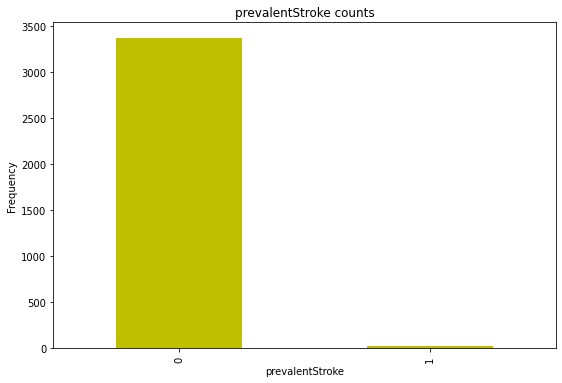

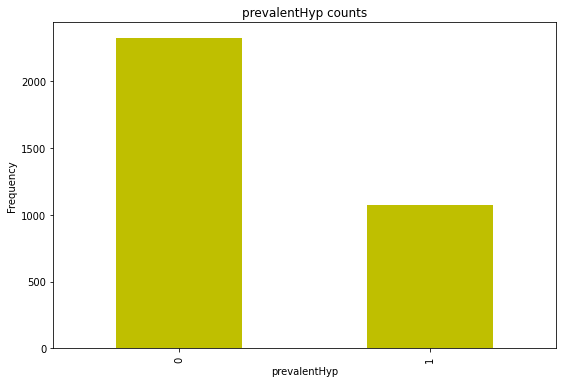

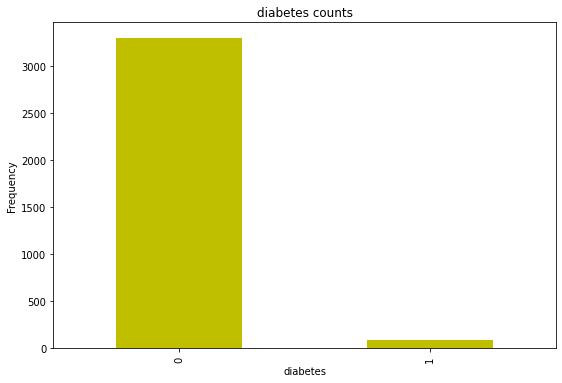

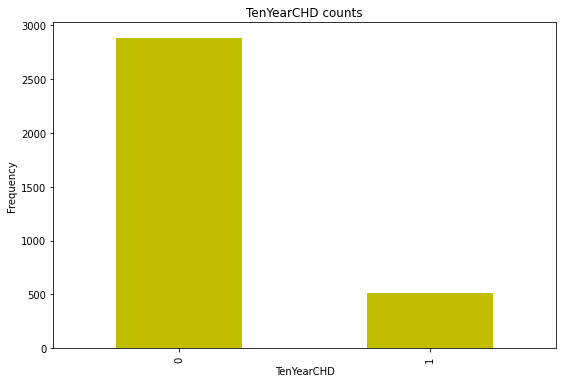

In [139]:
# Chart - 2 visualization code
categorical_features = df[['sex', 'is_smoking','BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']]
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='y')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3


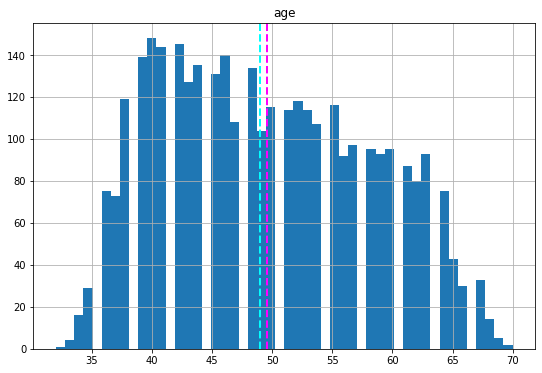

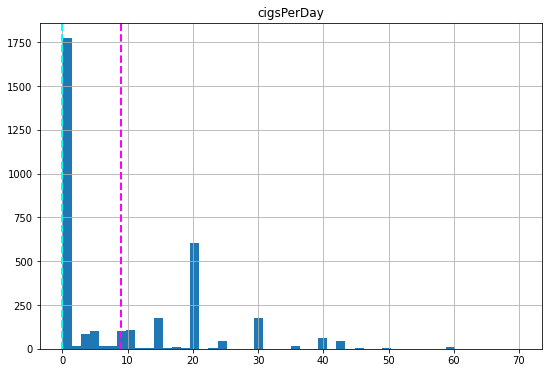

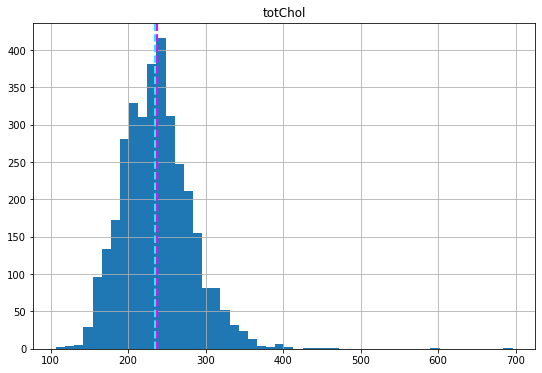

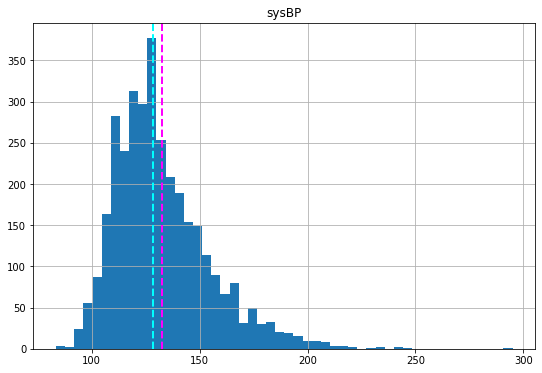

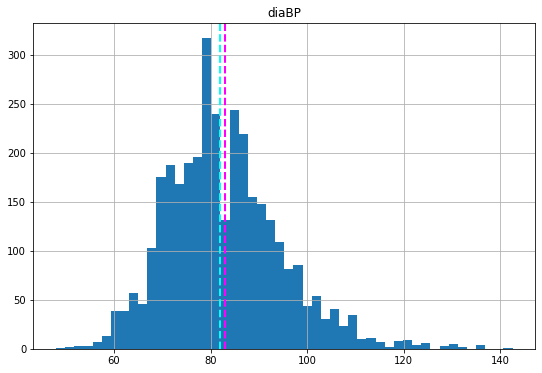

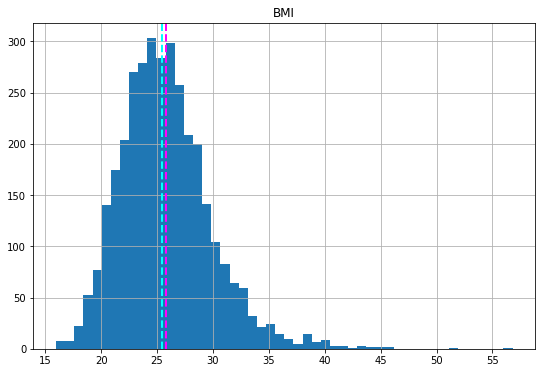

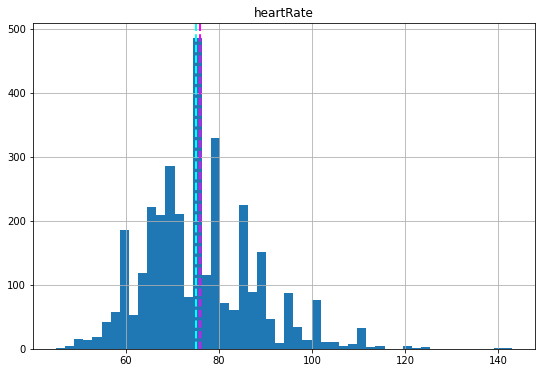

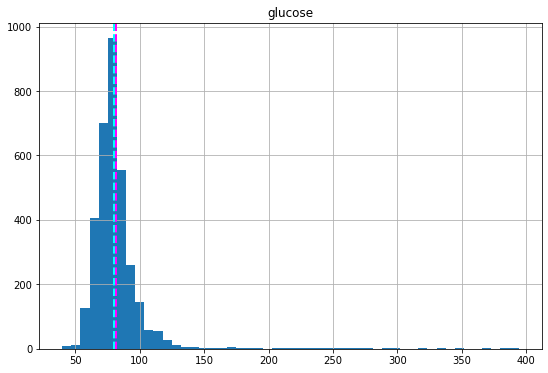

In [140]:
# Chart - 3 visualization code
continous_features = df[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
continous_features

for col in continous_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

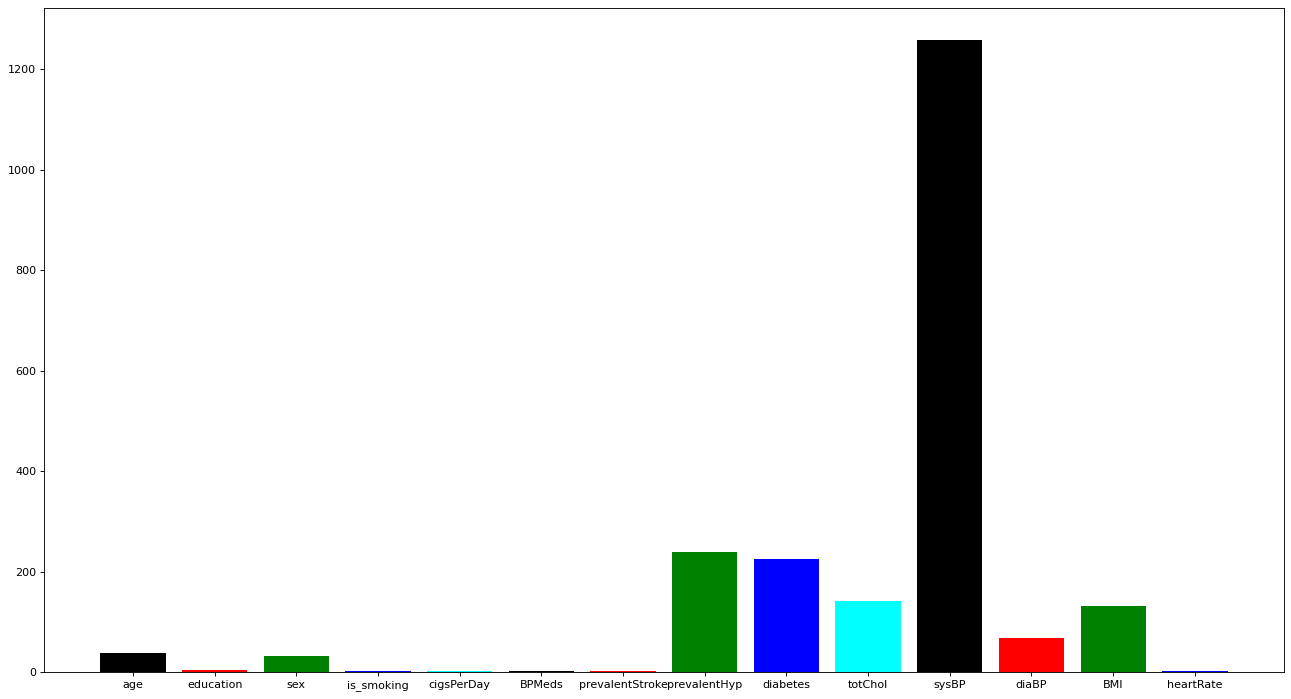

In [141]:
# Chart - 4 visualization code
names = list(unique_dict.keys())
values = list(unique_dict.values())
from matplotlib.pyplot import figure

figure(figsize=(20,11), dpi=80)
plt.bar(names,values,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5


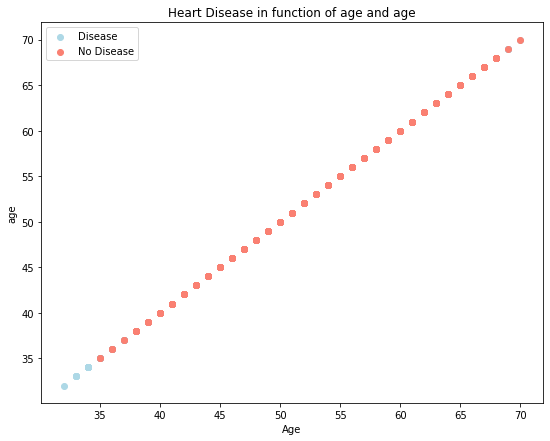

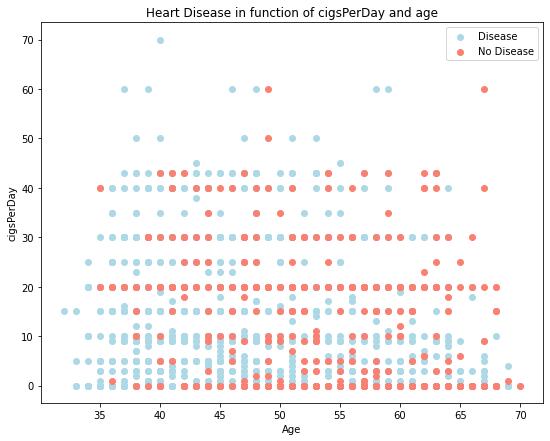

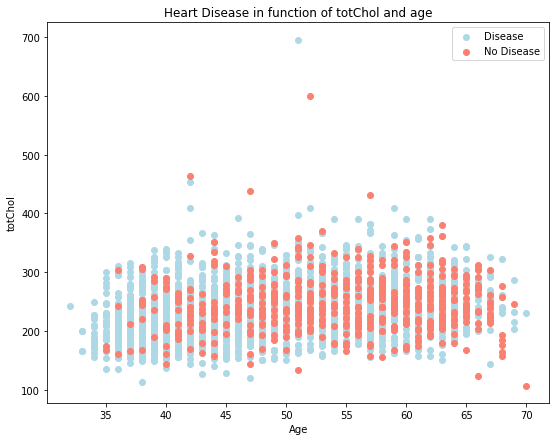

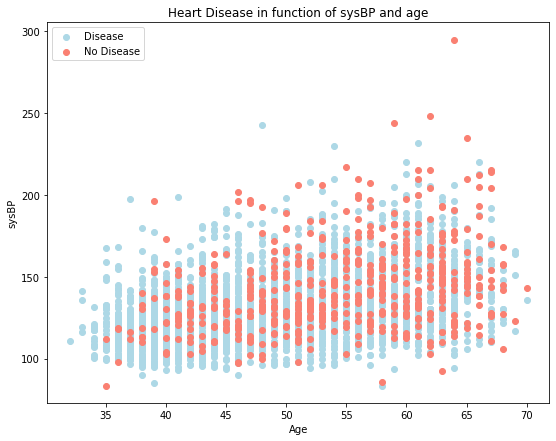

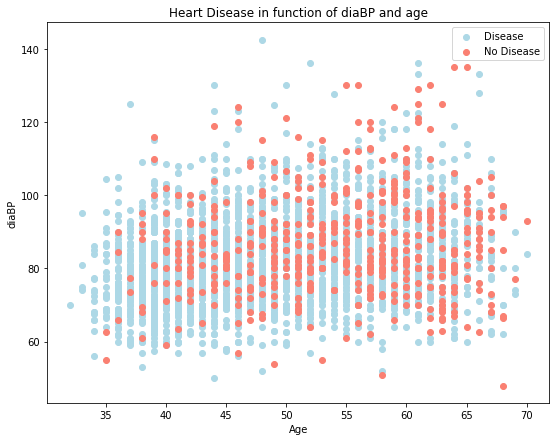

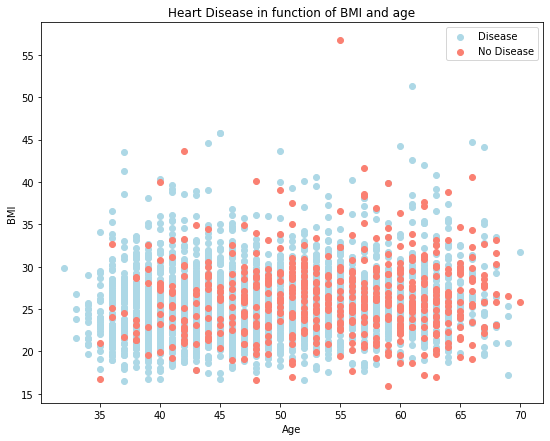

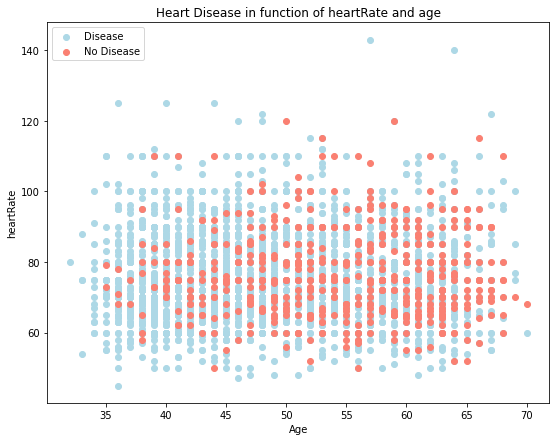

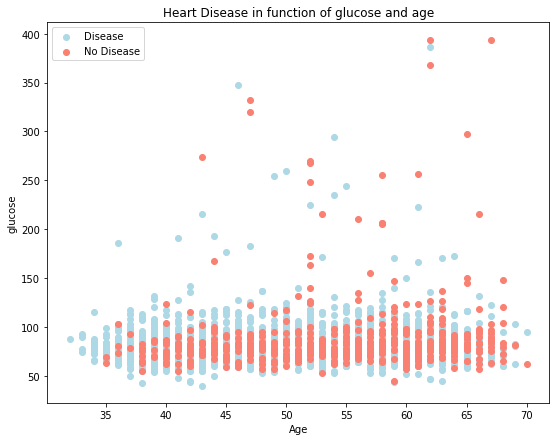

In [142]:
# Chart - 5 visualization code
for col in continous_features:
  plt.figure(figsize=(9, 7))
  features = df[col]

  # Scatter with negative examples
  plt.scatter(df.age[df.TenYearCHD==0],
              features[df.TenYearCHD==0],
              c="lightblue")

  # Scatter with postivie examples
  plt.scatter(df.age[df.TenYearCHD==1],
              features[df.TenYearCHD==1],
              c="salmon")

  # Add some helpful info
  plt.title(f"Heart Disease in function of {col} and age")
  plt.xlabel("Age")
  plt.ylabel(col)
  plt.legend(["Disease", "No Disease"]);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

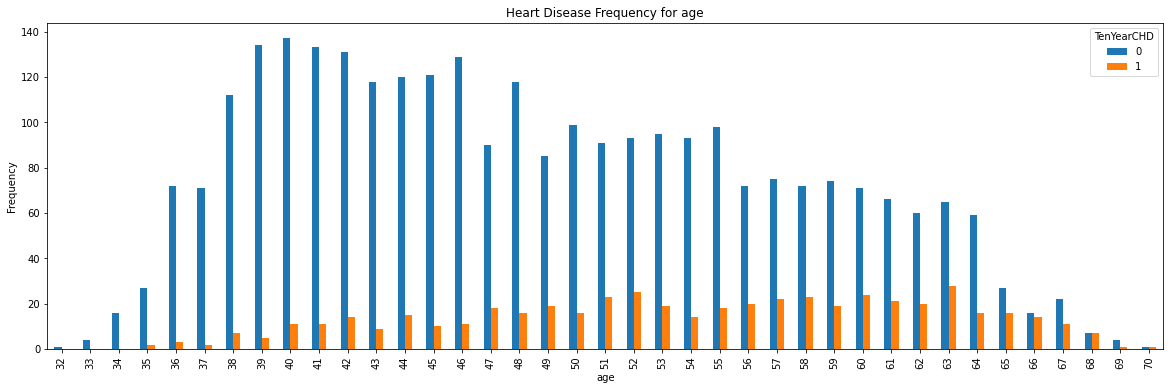

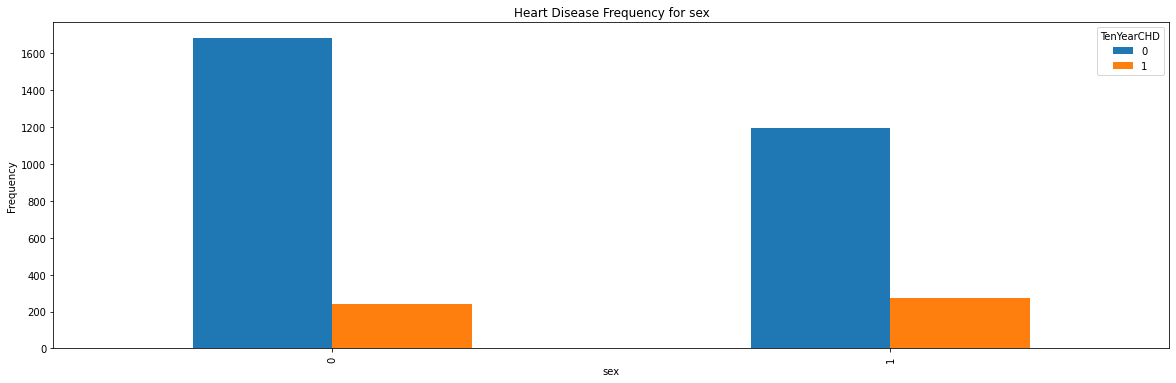

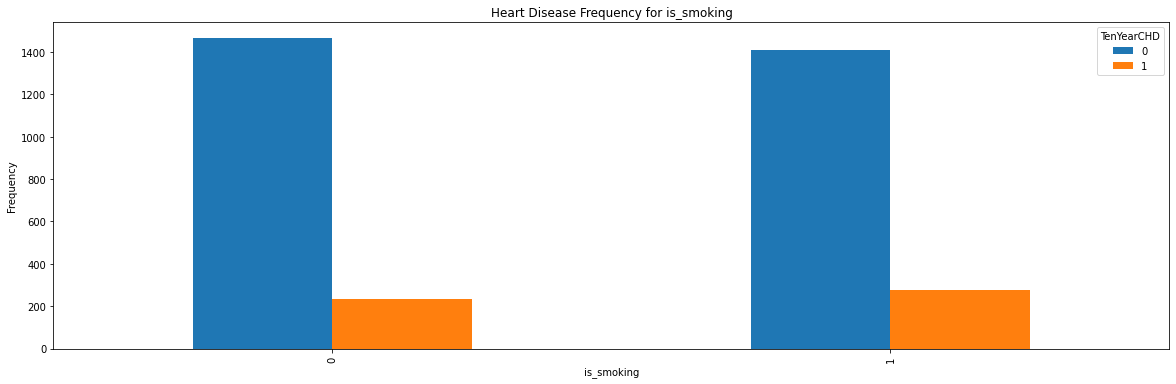

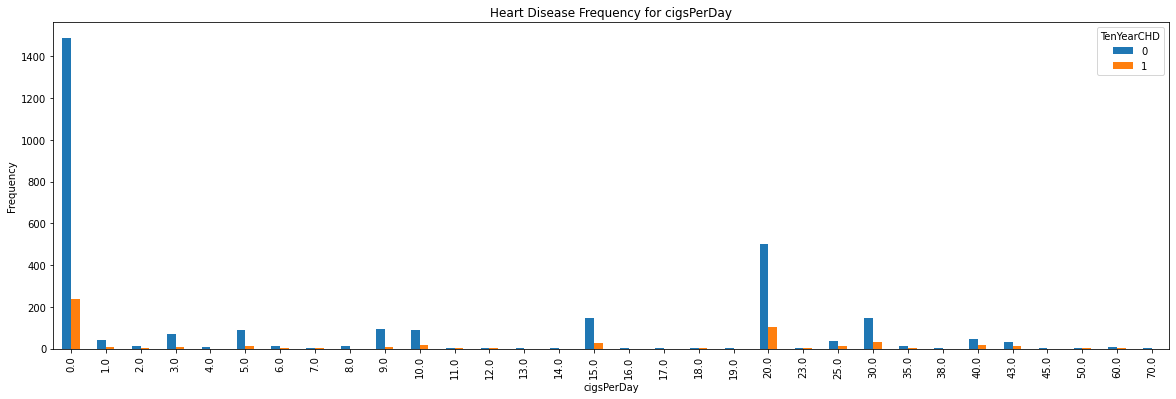

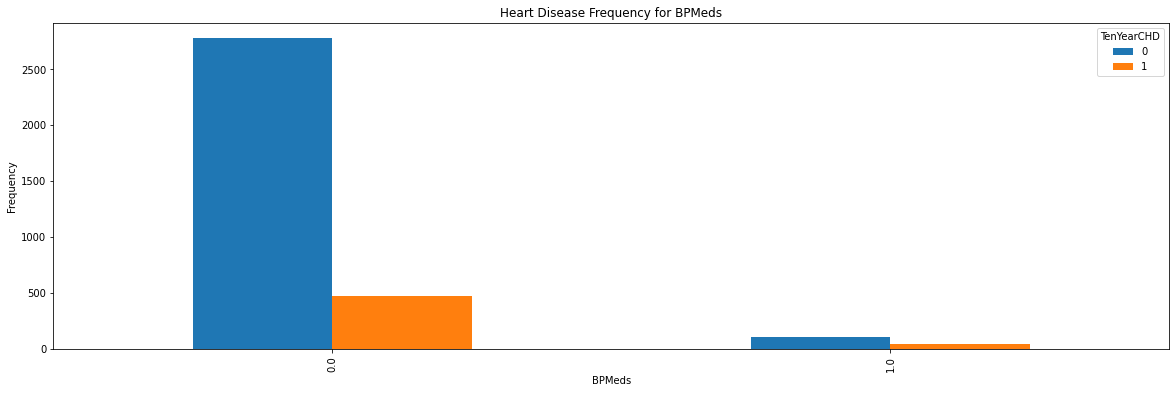

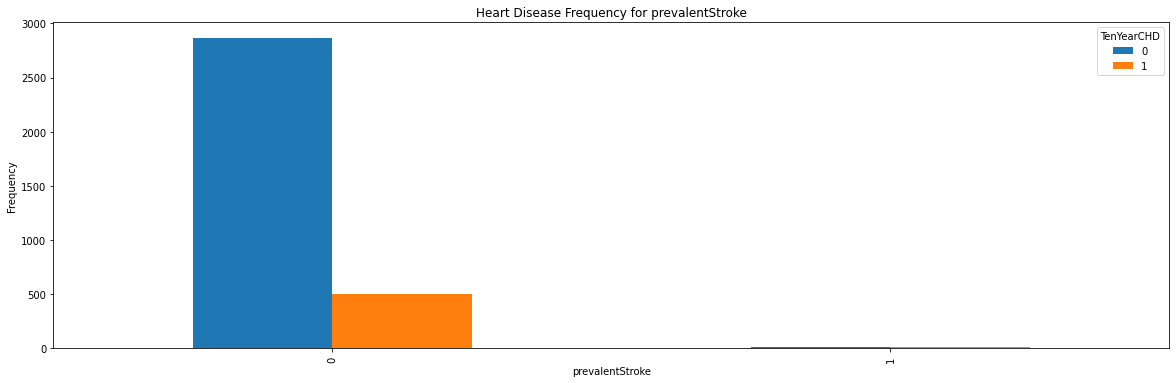

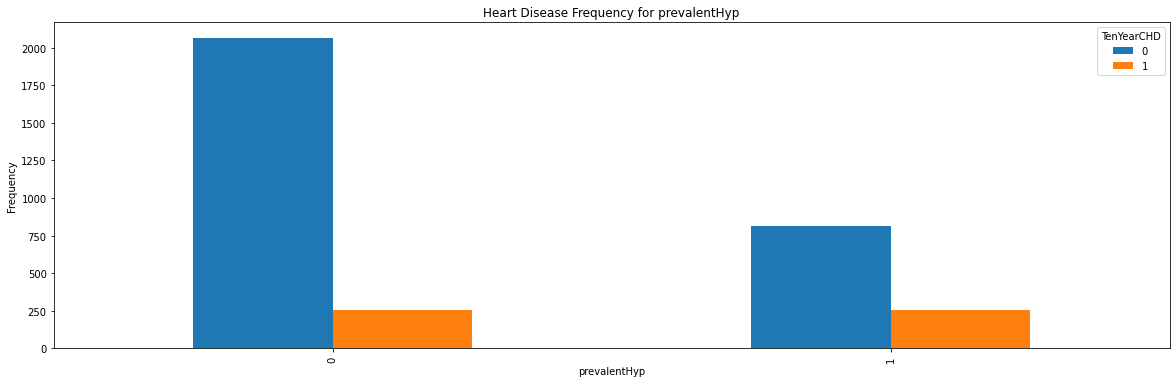

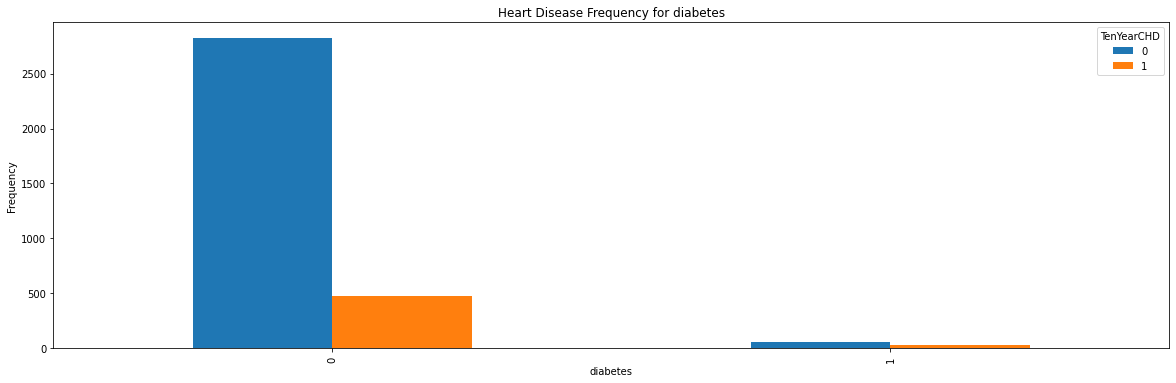

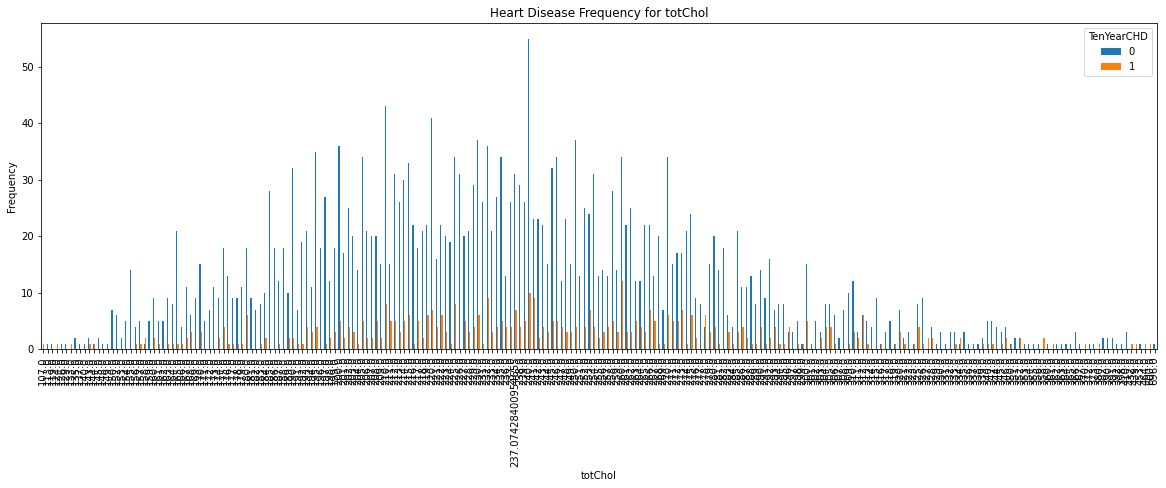

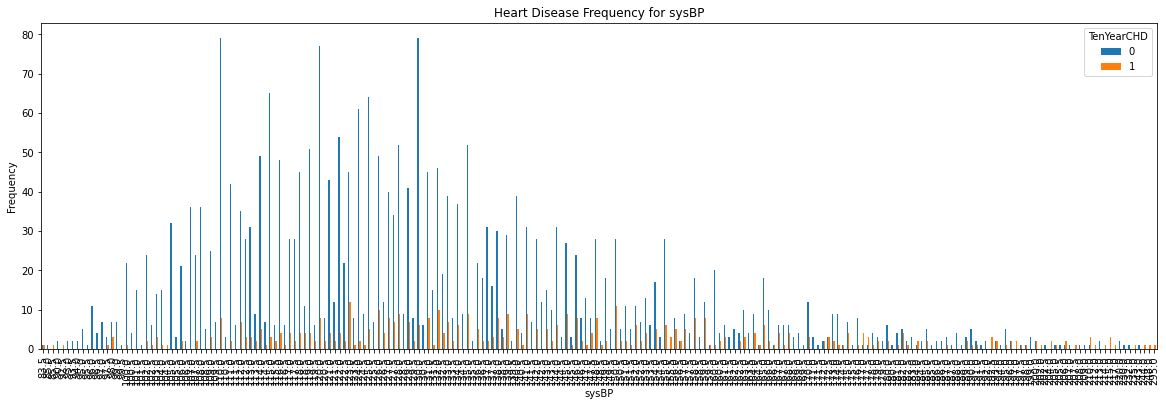

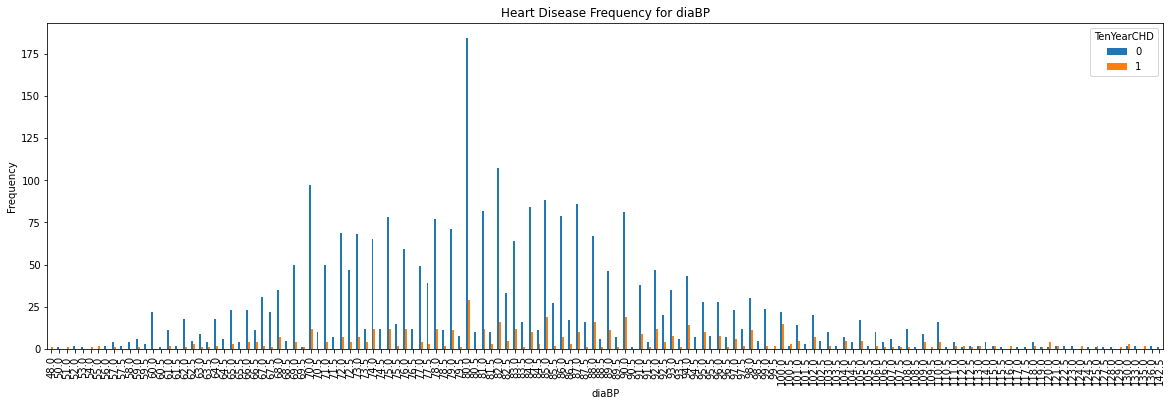

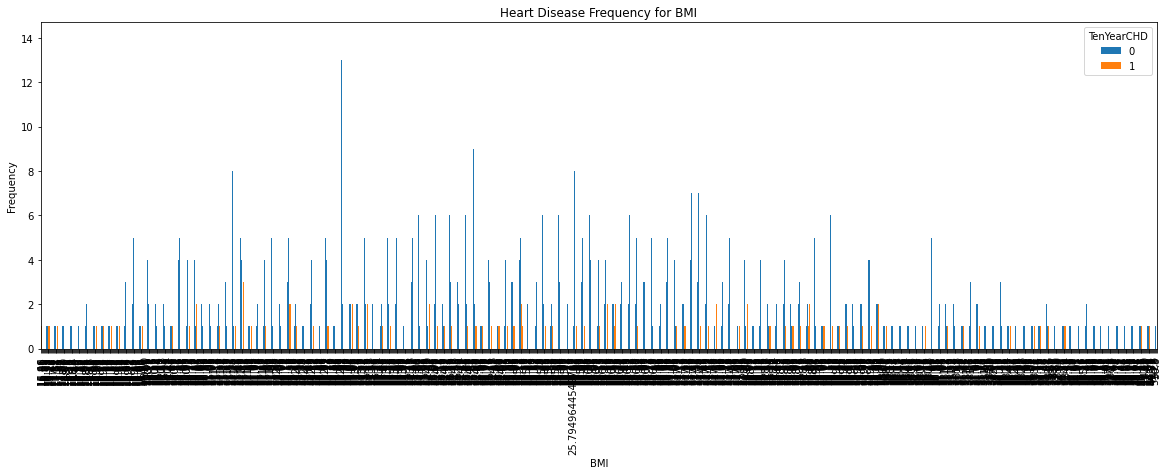

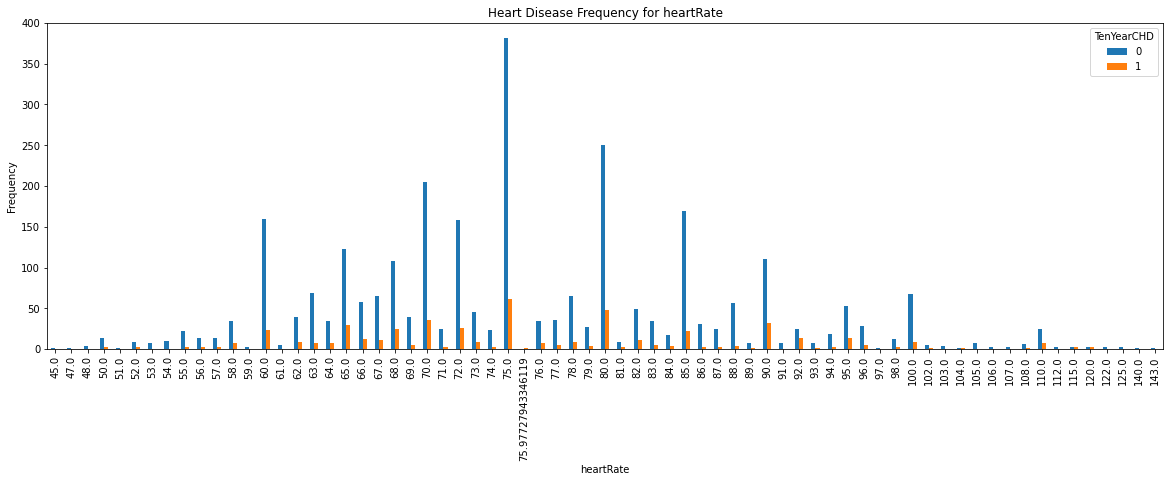

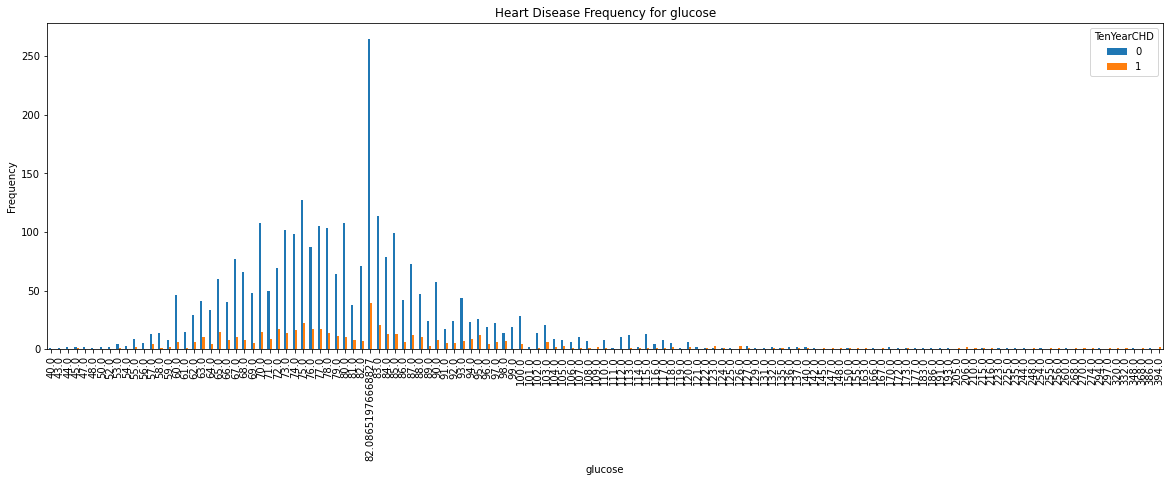

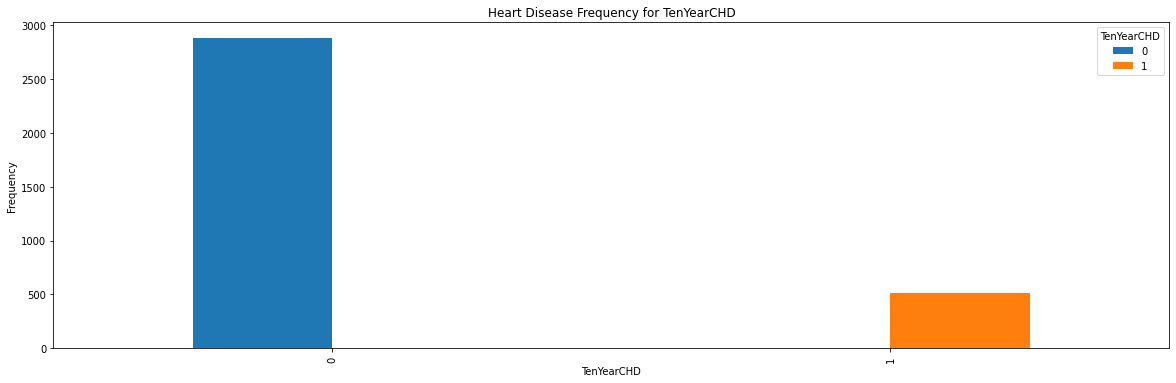

In [143]:
# Chart - 6 visualization code
features = df.columns
for col in features:
  featuring = df[col]
  pd.crosstab(featuring,df.TenYearCHD).plot(kind="bar",figsize=(20,6),)
  plt.title(f'Heart Disease Frequency for {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

[Text(0, 0, '0 - 40'),
 Text(0, 0, '41 - 50'),
 Text(0, 0, '51 - 60'),
 Text(0, 0, '61 - 70')]

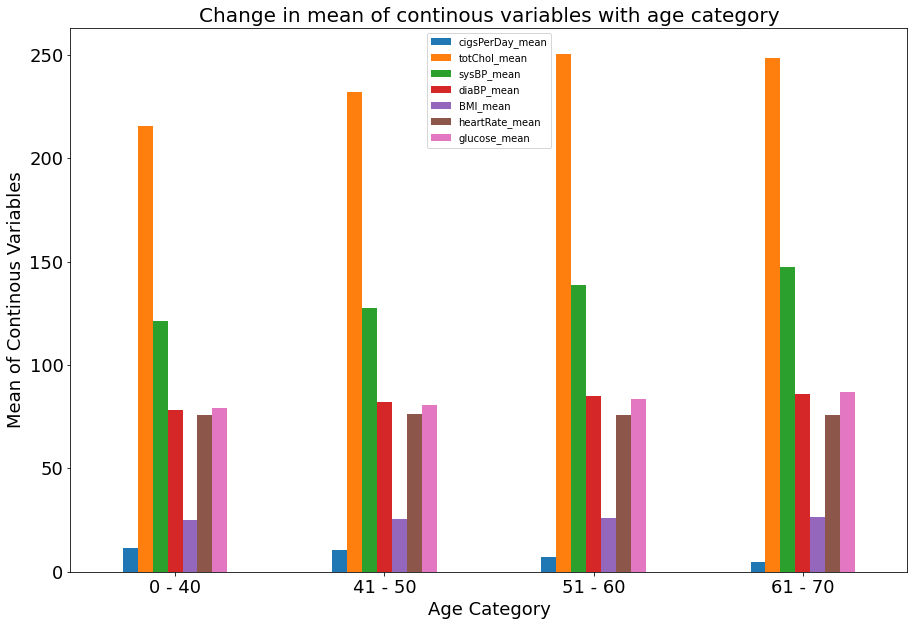

In [144]:
continous_features = df[['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']]
relevant_df = continous_features.copy()
relevant_df['age_cat'] = relevant_df['age'].apply(lambda x : 0 if x <= 40 else (1 if 40 < x <= 50 else (2 if 50< x <= 60 else (3 if 60< x <= 70 else(4 if 70< x else 5)))))
relevant_df.drop('age',axis =1,inplace=True)
relevant_df = relevant_df.groupby(["age_cat"]).mean()
relevant_df = relevant_df.rename(columns = {'cigsPerDay':'cigsPerDay_mean',
                                            'totChol':'totChol_mean',
                                            'sysBP':'sysBP_mean',
                                            'diaBP':'diaBP_mean',
                                            'BMI':'BMI_mean',
                                            'heartRate':'heartRate_mean',
                                            'glucose':'glucose_mean'})

plotting = relevant_df.plot.bar(figsize = (15,10),fontsize = 18)
plotting.set_title('Change in mean of continous variables with age category', fontsize = 20)
plotting.set_xlabel('Age Category', fontsize = 18)
plotting.set_ylabel('Mean of Continous Variables', fontsize = 18)
plotting.set_xticklabels(['0 - 40','41 - 50','51 - 60','61 - 70'],rotation=0) 


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

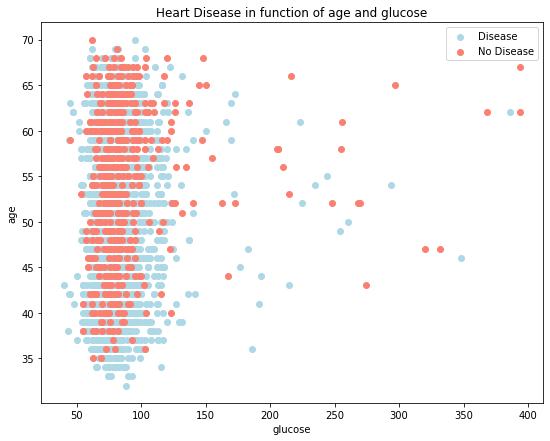

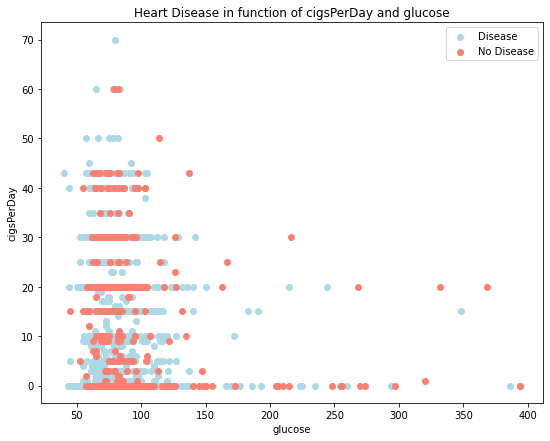

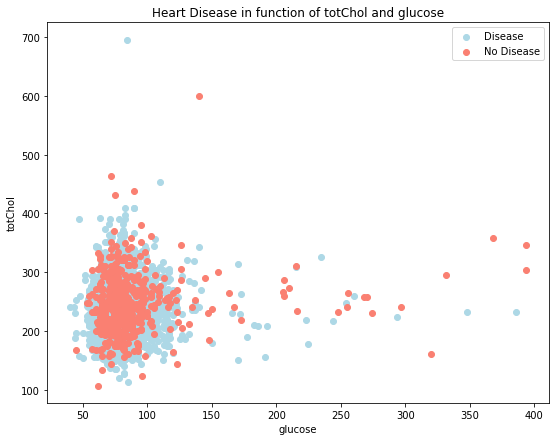

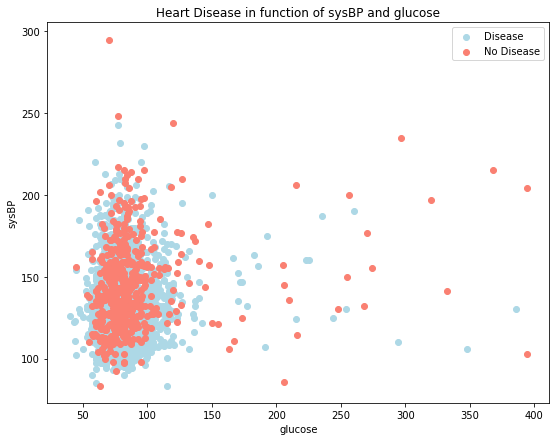

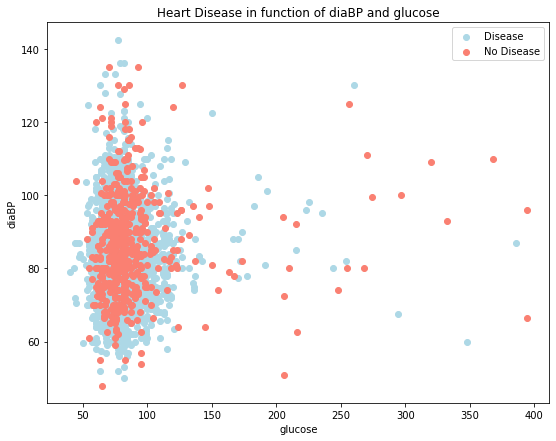

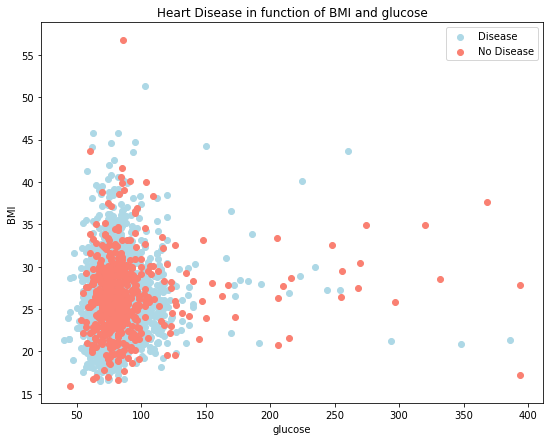

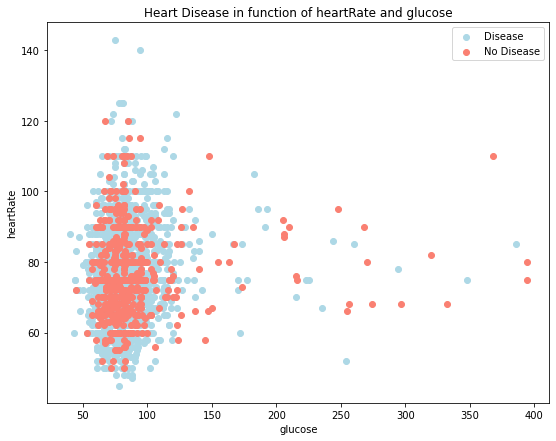

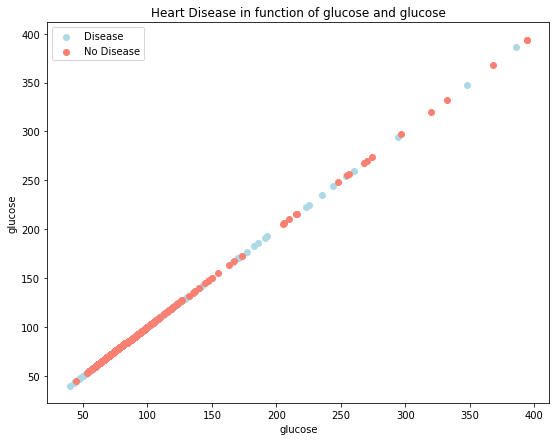

In [145]:
# Chart - 5 visualization code
for col in continous_features:
  plt.figure(figsize=(9, 7))
  features = df[col]
  # Scatter with negative examples
  plt.scatter(df.glucose[df.TenYearCHD==0],
              features[df.TenYearCHD==0],
              c='lightblue')
  # Scatter with postivie examples
  plt.scatter(df.glucose[df.TenYearCHD==1],
              features[df.TenYearCHD==1],
              c='salmon')

  # Add some helpful info
  plt.title(f"Heart Disease in function of {col} and glucose")
  plt.xlabel("glucose")
  plt.ylabel(col)
  plt.legend(["Disease", "No Disease"]);

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

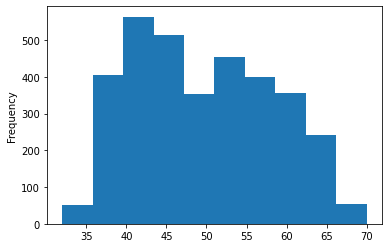

In [146]:
# Chart - 9 visualization code
df.age.plot.hist()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [147]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [148]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [149]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [150]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

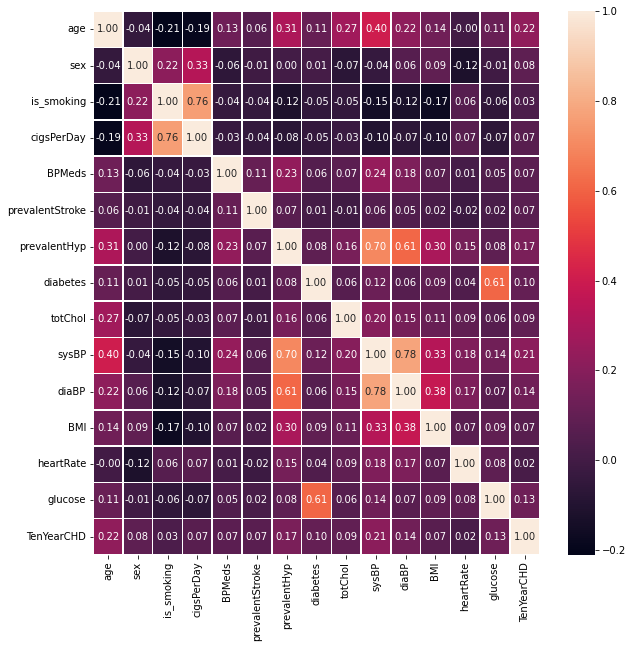

In [151]:
# Correlation Heatmap visualization code
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f"
                 );

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

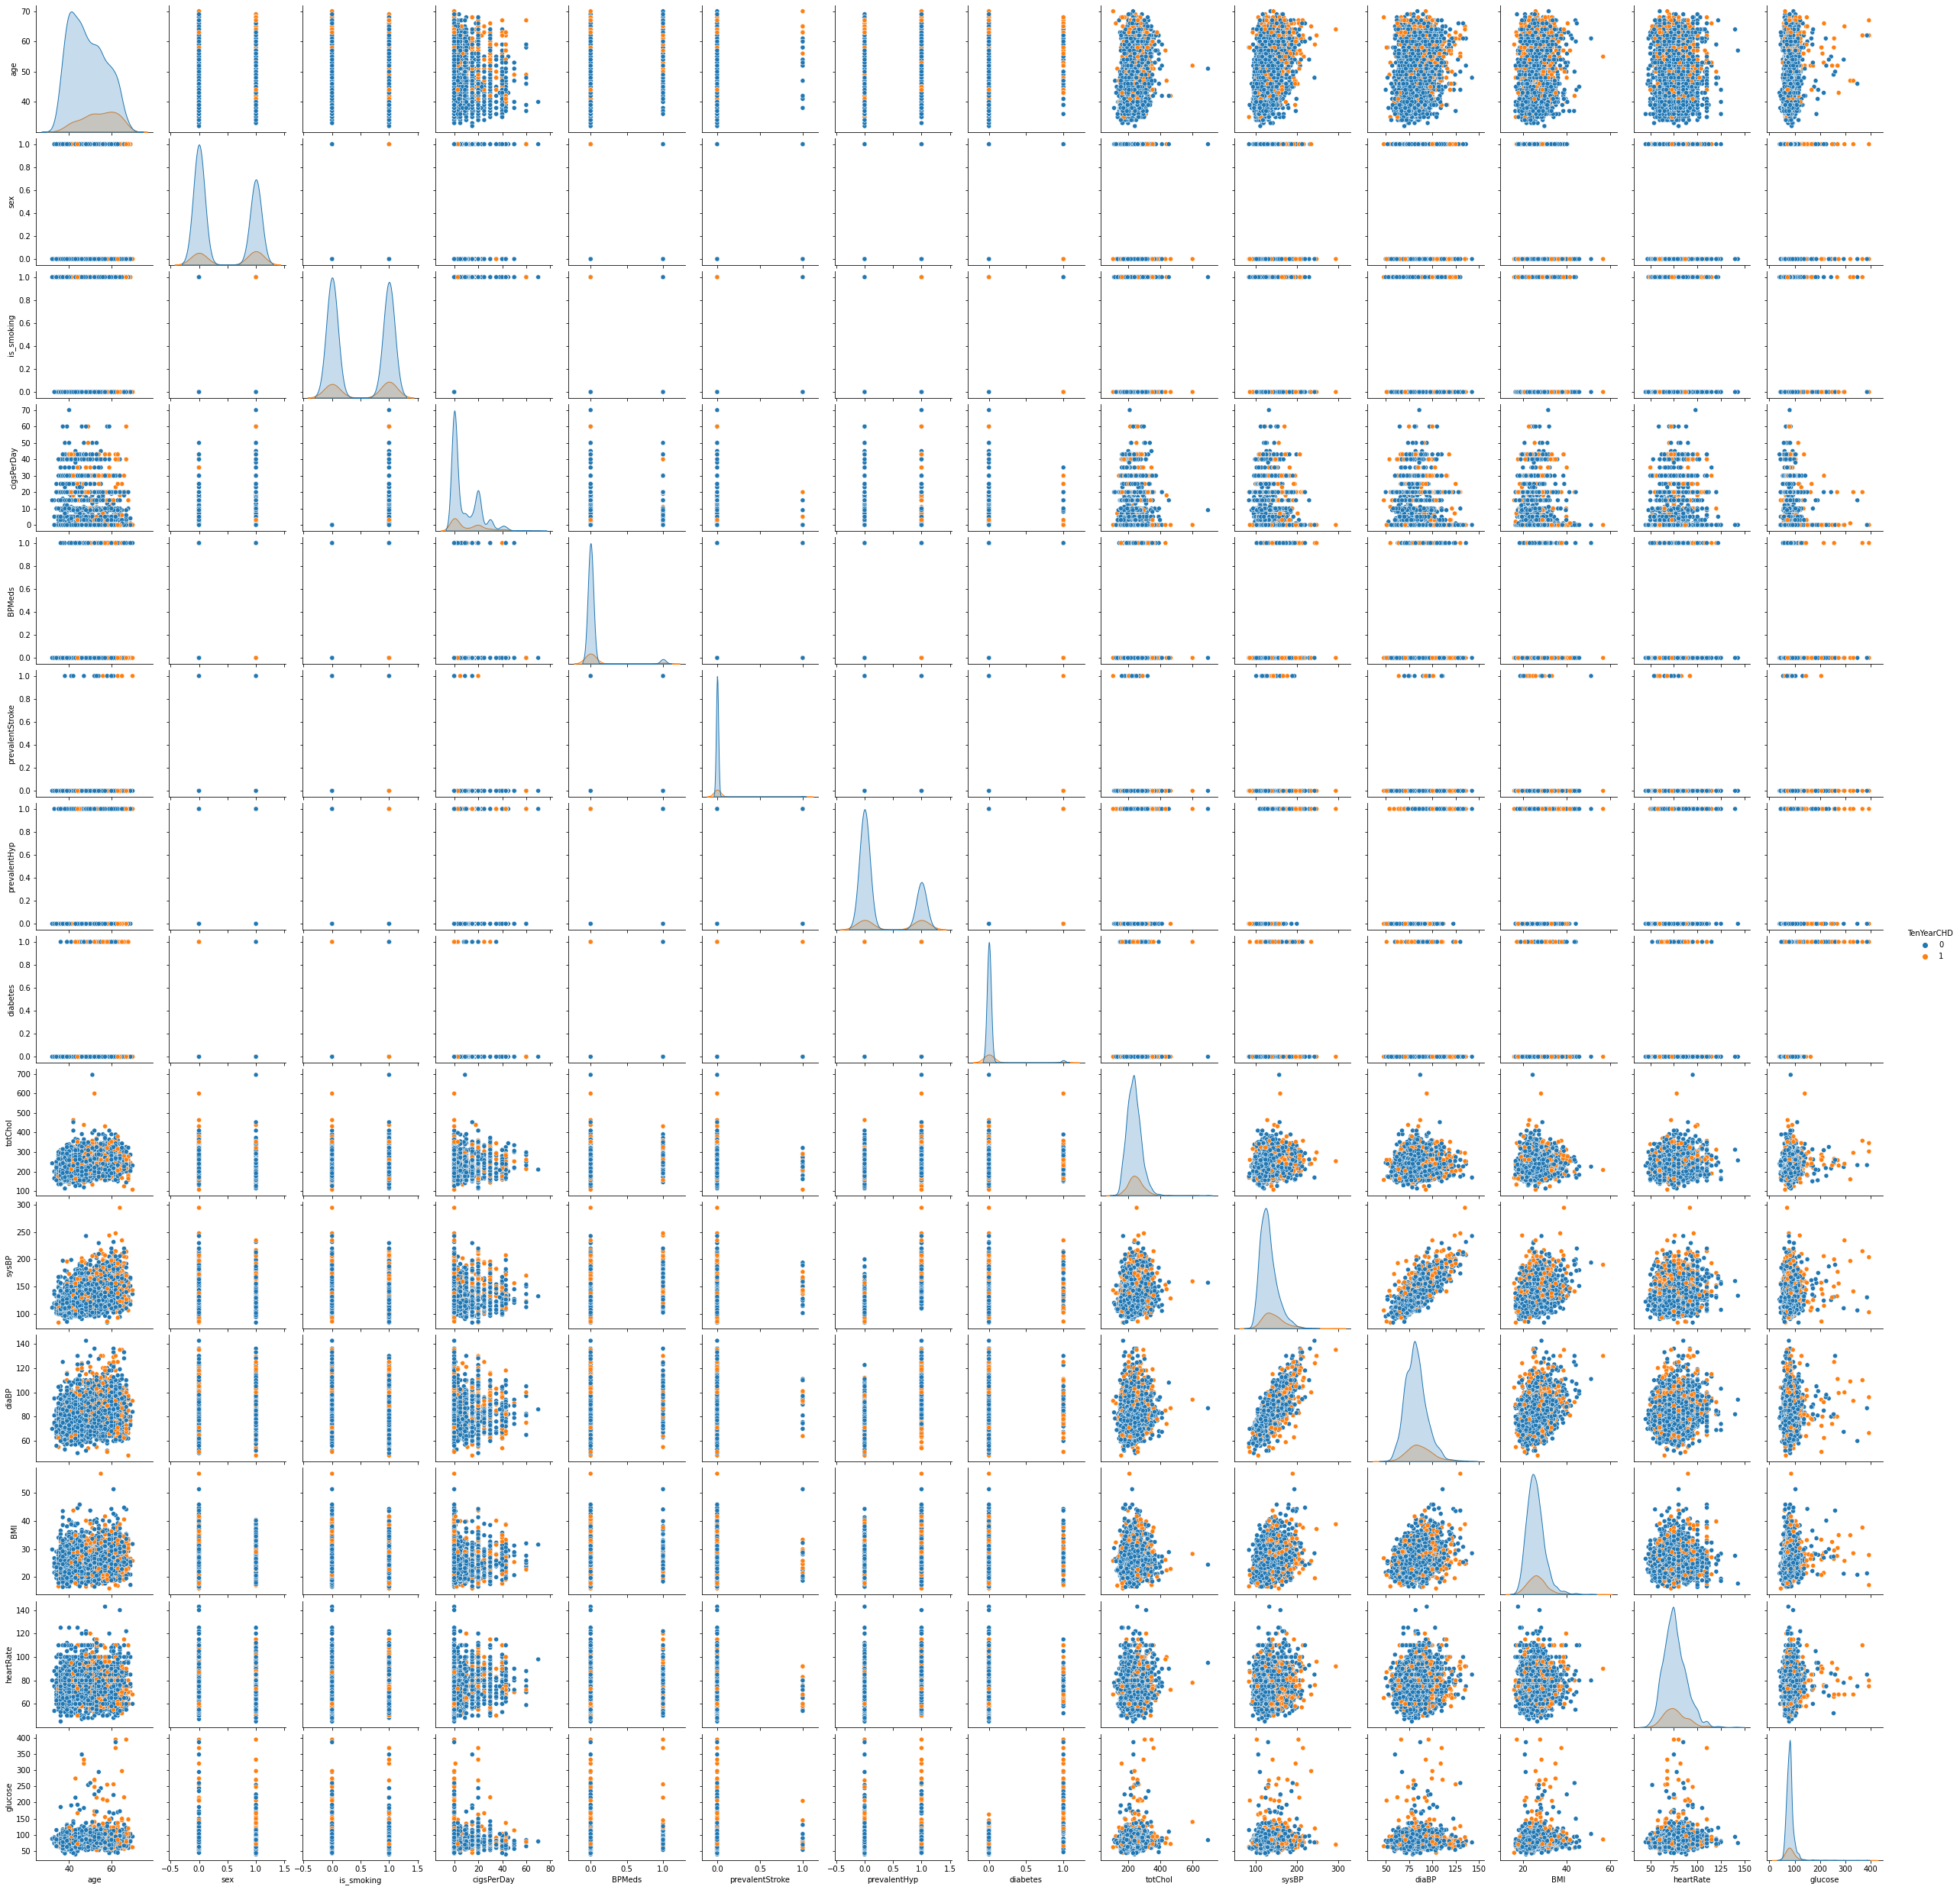

In [152]:
# Pair Plot visualization code
sns.pairplot(df,hue = 'TenYearCHD')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [153]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [154]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [155]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [156]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [157]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [158]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [159]:
# Expand Contraction

#### 2. Lower Casing

In [160]:
# Lower Casing

#### 3. Removing Punctuations

In [161]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [162]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [163]:
# Remove Stopwords

In [164]:
# Remove White spaces

#### 6. Rephrase Text

In [165]:
# Rephrase Text

#### 7. Tokenization

In [166]:
# Tokenization

#### 8. Text Normalization

In [167]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [168]:
# POS Taging

#### 10. Text Vectorization

In [169]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [170]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [171]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [172]:
# Transform Your data

### 6. Data Scaling

In [173]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [174]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [175]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [176]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [177]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [178]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [179]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [180]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [181]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [182]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [183]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [184]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [185]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [186]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***